# Import the Packages

In [1]:
import pyshark
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Global Variables

In [2]:
dict1 = {}
dict2 = {}
dict3 = {}
data = []
df = pd.DataFrame()
df_list = []

# Function Definitions


#### capture_live_packets()

In this function, the LiveCapture function of the PyShark package is called. The network interface is sent as a parameter to the LiveCapture function. 

#### convert_set_list_to_df()

The 'set' of data extracted from the packets have to be properly processed. This function would convert list of 'set' created by the get_ip_packet_details(), get_tcp_packet_details(), get_icmp_packet_details() and get_udp_packet_details() to a Pandas DataFrame. These newly created DataFrames are added to a list of dataframe which is processed at the end. 

#### get_ip_packet_details()

The incoming packet contains IP data information that needs to be extracted. This function searches for the 'all fields' key in the incoming data that has been converted to dictionary this values are added to a list of sets. This list of sets is later processed in convert_set_list_to_df().  

#### get_tcp_packet_details()

The incoming packet contains TCP data information that needs to be extracted. This function searches for the 'all fields' key in the incoming data that has been converted to dictionary this values are added to a list of sets. This list of sets is later processed in convert_set_list_to_df(). 

#### get_icmp_packet_details()

The incoming packet contains ICMP data information that needs to be extracted. This function searches for the 'all fields' key in the incoming data that has been converted to dictionary this values are added to a list of sets. This list of sets is later processed in convert_set_list_to_df(). 

#### get_udp_packet_details()

The incoming packet contains UDP data information that needs to be extracted. This function searches for the 'all fields' key in the incoming data that has been converted to dictionary this values are added to a list of sets. This list of sets is later processed in convert_set_list_to_df(). 

#### filter_all_traffic_file()

This function is called in the capture_live_packets() function. This function ensures that all IP, TCP, ICMP and UDP information from the packets are extracted. 



In [3]:
def capture_live_packets(network_interface):
    i=0
    capture = pyshark.LiveCapture(interface=network_interface)
    for raw_packet in capture.sniff_continuously():
        if i < 5000:
            filter_all_traffic_file(raw_packet)
            i = i+1
        else:
            break

def convert_set_list_to_df(data):
    for i in data:
        df1 = pd.DataFrame.from_dict(data)
        df_list.append(df1)
                      
def get_ip_packet_details(packet):
    dict1 = packet.ip.__dict__['_all_fields']
    dict1['Protocol']='IP'
    data.append(dict1)
            
def get_tcp_packet_details(packet):
    dict1 = packet.tcp.__dict__['_all_fields']
    dict1['Protocol']='TCP'
    data.append(dict1)
    
def get_icmp_packet_details(packet):
    dict2 = packet.icmp.__dict__['_all_fields']
    dict2['Protocol']='ICMP'
    data.append(dict2)
    
def get_udp_packet_details(packet):
    dict3 = packet.udp.__dict__['_all_fields']
    dict3['Protocol']='UDP'
    data.append(dict3)

def filter_all_traffic_file(packet):
    if hasattr(packet, 'ip'):
        results = get_ip_packet_details(packet)
    if hasattr(packet, 'tcp'):
        results = get_tcp_packet_details(packet)    
    if hasattr(packet, 'icmp'):
        results = get_icmp_packet_details(packet)
    if hasattr(packet, 'udp'):
        results = get_udp_packet_details(packet)
    return 0

# Main Function Call

In the next cell, the network interface that has to be monitored is passed as parameter. While running the code in Raspberry Pi, the network interface would have to be changed accordingly (Based on the _ifconfig_ command). 


#### Note:
Once all the processing is done, we have to combine the list of dataframe to create one dataframe. 

In [4]:
capture_live_packets('ens33')
convert_set_list_to_df(data)
df = pd.concat(df_list)

### Convert Pandas DataFrame to CSV File

In [5]:
df.to_csv('Data.csv')

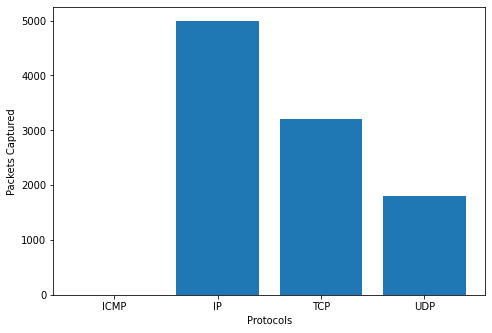

In [6]:
df = pd.read_csv('Data.csv')
icmp_data = (df['Protocol']=='ICMP').sum()
ip_data = (df['Protocol']=='IP').sum()
tcp_data = (df['Protocol']=='TCP').sum()
udp_data = (df['Protocol']=='UDP').sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Protocols')
ax.set_ylabel('Packets Captured')
protocol = ['ICMP', 'IP', 'TCP', 'UDP']
value = [icmp_data,ip_data,tcp_data,udp_data]
ax.bar(protocol,value)
plt.show()